# Sales Prediction Using Machine Learning


###### Machine Learning is a powerful tool that can be used to predict sales and improve business outcomes.

###### Machine Learning Methods for sales prediction:
1. Regression Analysis
2. Time Series Analysis
3. Decision Based Algorithms: Random Forest, Gradient Boosting
4. Neural Networks
5. Clustering Algorithms

# 1. Importing Libraries

In [1]:
# EDA libraries

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# LSTM: (neural network)

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import LSTM

# ARIMA Model

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

import pickle
import warnings

# 2. Loading and Exploration of the Data

We use a sample dataset from Kaggle for this demonstration. Each row reflects a day's worth of sales at one of 10 stores in the most basic form.

Our objective is to forecast monthly sales, we will start by adding all stores and days to get the monthly sales figure

We will create a function that will be used for the extraction of a CSV file and then converting it to pandas data frame.

In [2]:
def load_data(file_name):
    """ Returns a pandas dataframe from a csv file"""
    return pd.read_csv(file_name)

df_s = load_data('sales_data.csv')

df_s.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [3]:
df_s.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None


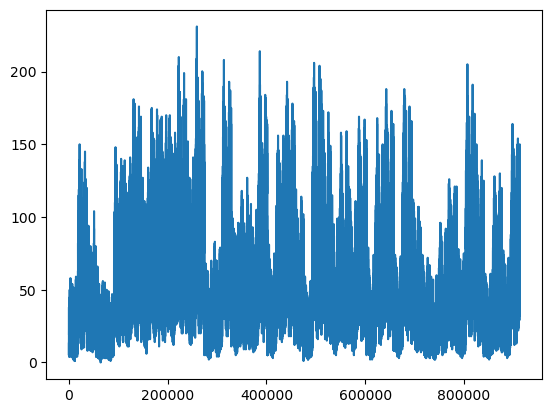

In [4]:
# to view the basic statistical details about the dataset:

df_s['sales'].plot()

print(df_s.info())

The below function returns a dataframe where each row represents total sales for a given month.  
Columns include 'date' by month and 'sales'

In [5]:
def monthlyORyears_sales(data,time=['monthly','years']):
    dataD = data.copy()
    
    dataD['date'] = pd.to_datetime(dataD['date'])
    
    if 'monthly' in time:
        # drop day indicator from date column:
        dataD['date'] = dataD['date'].dt.to_period('M').dt.to_timestamp()
    else:
        dataD['date'] = dataD['date'].dt.to_period('Y').dt.to_timestamp()
        
    #sum sales per month
    dataD = dataD.groupby('date')['sales'].sum().reset_index()
    
    return dataD

Total sales for a given month across all stores : 

In [6]:
m_df = monthlyORyears_sales(df_s,"monthly")
m_df.head(12)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


Total sales for a given year across all the stores :

In [7]:
y_df = monthlyORyears_sales(df_s,"years")
y_df

,date,sales
0,2013-01-01,7941243
1,2014-01-01,9135482
2,2015-01-01,9536887
3,2016-01-01,10357160
4,2017-01-01,10733740


Visualization :

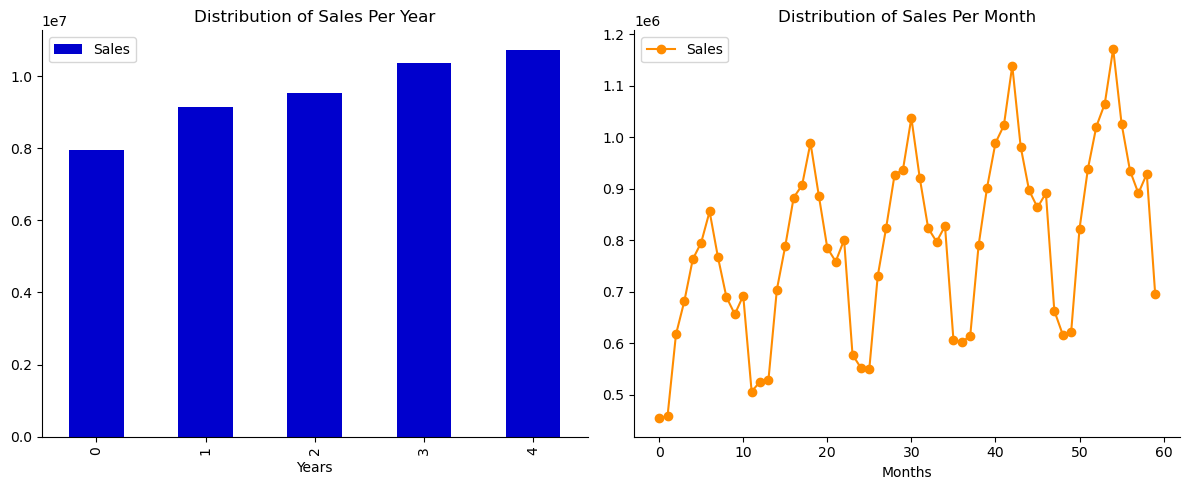

In [14]:
layout = (1,2)

raw = plt.subplot2grid(layout,(0,0))
law = plt.subplot2grid(layout,(0,1))

years = y_df['sales'].plot(kind='bar',color='mediumblue',label='Sales',figsize=(12,5),ax=raw)
months = m_df['sales'].plot(marker='o',color='darkorange',label="Sales",ax=law)

years.set(xlabel="Years", title="Distribution of Sales Per Year")
months.set(xlabel="Months", title="Distribution of Sales Per Month")

sns.despine()
plt.tight_layout()

years.legend()
months.legend()